<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.1.3 - Central Limit Theorem

## Data

The Philippine Statistics Authority (PSA) spearheads the conduct of the Family Income and Expenditure Survey (FIES) nationwide. The survey, which is undertaken every three (3) years, is aimed at providing data on family income and expenditure, including, among others, levels of consumption by item of expenditure, sources of income in cash, and related information affecting income and expenditure levels and patterns in the Philippines.

You can download the data from [here](https://www.kaggle.com/grosvenpaul/family-income-and-expenditure).

The purpose of today's lab is to use simulation to visualise the sampling distribution for the sample mean. The Central Limit Theorem (CLT) tells us that as our sample size gets larger, the sampling distribution of the sample mean converges to a normal distribution. Therefore, when we have a large sample size, we can say that the sampling distribution for the sample mean is approximately normal, regardless of the distribution from which we are sampling.

Let's start by taking a look at the data, **`Total Household Income`** will serve as a "population" for the purposes of this lab.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [76]:
house_hold_csv = "C:/Users/patri/OneDrive/UTS and personal doc 2022/Documents/Person Docs/Data science program/DATA/Family_Income_and_Expenditure.csv"
# Read CSV
df = pd.read_csv(house_hold_csv)
df

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [77]:
# Head
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [8]:
# describe 
df.describe()

,Total Household Income,Total Food Expenditure,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,Vegetables Expenditure,Restaurant and hotels Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
count,4.154400e+04,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,...,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000,41544.000000
mean,2.475556e+05,85099.158194,0.429858,25133.723642,18195.825005,10540.072574,10529.318337,2550.474990,5006.918568,15436.566075,...,0.394184,0.319806,0.129814,0.081215,0.060610,1.905738,0.315015,0.135038,0.013119,0.289885
std,2.868805e+05,51637.947682,0.676666,13466.482984,11727.224350,10497.727757,7812.201613,2969.752879,3300.175236,23705.195929,...,0.537025,0.478482,0.448673,0.346786,0.276732,1.558130,0.739698,0.354083,0.127171,0.558408
min,1.128500e+04,2947.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.048950e+05,51017.250000,0.000000,16556.000000,11020.000000,3353.750000,5504.000000,1024.750000,2873.000000,1930.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.640795e+05,72985.500000,0.000000,23324.000000,16620.000000,7332.500000,8695.000000,1820.000000,4314.000000,7314.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.911385e+05,105635.500000,1.000000,31439.000000,23920.000000,14292.000000,13388.000000,3100.000000,6304.250000,19921.250000,...,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,1.181599e+07,827565.000000,2.000000,765864.000000,758326.000000,261566.000000,188208.000000,273769.000000,74800.000000,725296.000000,...,5.000000,3.000000,5.000000,5.000000,4.000000,10.000000,6.000000,3.000000,3.000000,5.000000


In [78]:
# Tail
df.tail()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0
41543,128598,XII - SOCCSKSARGEN,78195,Enterpreneurial Activities,1,43485,41205,1985,7735,2062,...,0,0,0,0,0,1,0,0,0,0


In [79]:
# Shape
df.shape

(41544, 60)

In [80]:
# Data Types
df.dtypes

Total Household Income                            int64
Region                                           object
Total Food Expenditure                            int64
Main Source of Income                            object
Agricultural Household indicator                  int64
Bread and Cereals Expenditure                     int64
Total Rice Expenditure                            int64
Meat Expenditure                                  int64
Total Fish and  marine products Expenditure       int64
Fruit Expenditure                                 int64
Vegetables Expenditure                            int64
Restaurant and hotels Expenditure                 int64
Alcoholic Beverages Expenditure                   int64
Tobacco Expenditure                               int64
Clothing, Footwear and Other Wear Expenditure     int64
Housing and water Expenditure                     int64
Imputed House Rental Value                        int64
Medical Care Expenditure                        

#### Surveying the populations

##### 1. Create a histogram of `Total Household Income`.

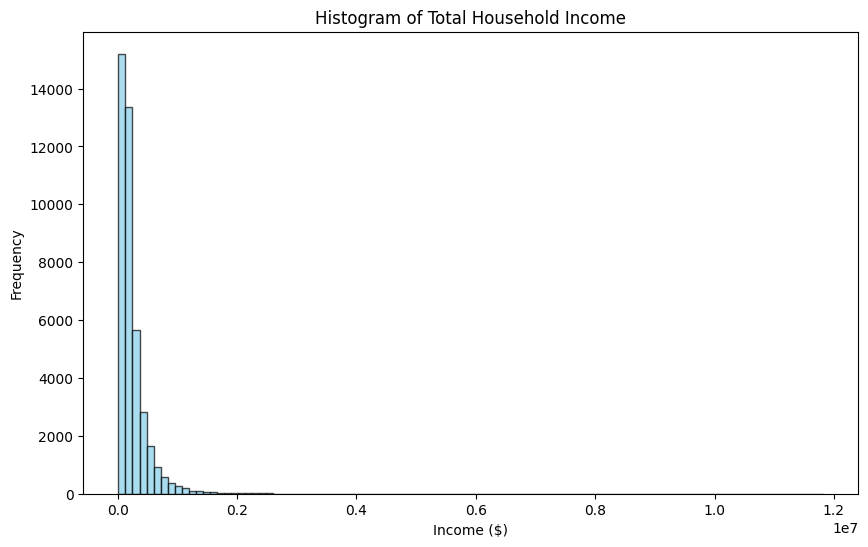

In [81]:
# ANSWER
# Plot histogram for Total Household Income
plt.figure(figsize=(10, 6))
df['Total Household Income'].plot(kind='hist', bins=100, edgecolor='black', color='skyblue', alpha=0.7)

# Add labels and title
plt.title('Histogram of Total Household Income')
plt.xlabel('Income ($)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

##### 2. How would you describe the shape of this population?

In [ ]:
The population distribution is right Skewed

**ANSWER:**


##### 2. What is the mean income of this population?

In [82]:
# ANSWER
mean_income= df['Total Household Income'].mean()


print(f"The mean income of this population: ${mean_income:,.3f}")

The mean income of this population: $247,555.585


##### 3. What sampling statistic/point estimate would you use to estimate the

---

mean of this population if you were given a random sample from the population?

In [83]:
# ANSWER
sample_mean = df['Total Household Income'].mean()

print(f"The sample mean (point estimate) of Total Household Income: ${sample_mean:,.4f}")

The sample mean (point estimate) of Total Household Income: $247,555.5848


**ANSWER:**


#### Simulated sampling (sample means)

Now, we'd like to get an idea of what happens when we take multiple random samples of size 5.

Take 10 sample (size=5) from the entire population. Calculate means for each sample. Now make a histogram of all the sample means.

- Describe the shape of the histogram.
- What is the center of the distribution of sample means?

##### 4. Simulation with `sample_size=5`

Take 10 samples, but with a sample size of 5.

In [117]:
# ANSWER
# Set the number of samples and the sample size
num_samples = 1000
sample_size = 50

# List to store the sample means
sample_means = []

# Generate 10 samples and calculate the mean for each sample
for _ in range(num_samples):
    sample = np.random.choice(df['Total Household Income'], size=sample_size, replace=True)  # Random sample with replacement
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

###### 4.A Make a histogram of all the sample means

<Figure size 1000x700 with 0 Axes>

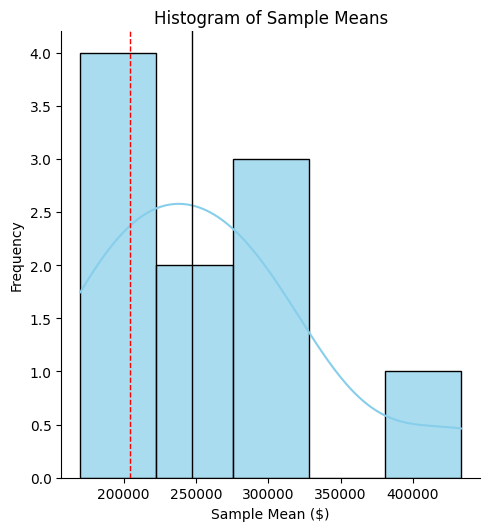

In [100]:
# ANSWER
# Plotting the histogram of sample means
plt.figure(figsize=(10, 7))
sns.displot(sample_means, kde=True, bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_income, color='black', linestyle='solid', lw=1)
plt.axvline(sample_mean, color='red', linestyle='dashed', lw=1)
# Add title and labels
plt.title('Histogram of Sample Means')
plt.xlabel('Sample Mean ($)')
plt.ylabel('Frequency')

# Show the plot
plt.show()





###### 4.B Describe the shape of the histogram.

**ANSWER:**


##### 7. Simulation with `sample_size=15`

let's try taking another 1000 samples, but with a sample size of 15

<Figure size 700x500 with 0 Axes>

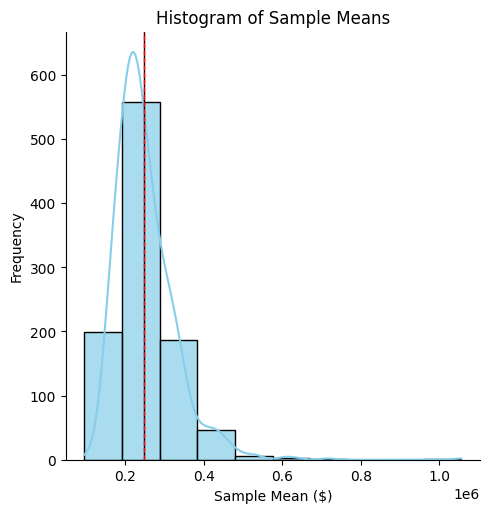

In [102]:
# Plotting the histogram of sample means
plt.figure(figsize=(7, 5))
sns.displot(sample_means, kde=True, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_income, color='black', linestyle='solid', lw=1)
plt.axvline(sample_mean, color='red', linestyle='dashed', lw=1)
# Add title and labels
plt.title('Histogram of Sample Means')
plt.xlabel('Sample Mean ($)')
plt.ylabel('Frequency')

# Show the plot
plt.show()



##### 8. Simulation with `sample_size=50`

Let's try taking another 1000 samples, but with a sample size of 50

<Figure size 700x500 with 0 Axes>

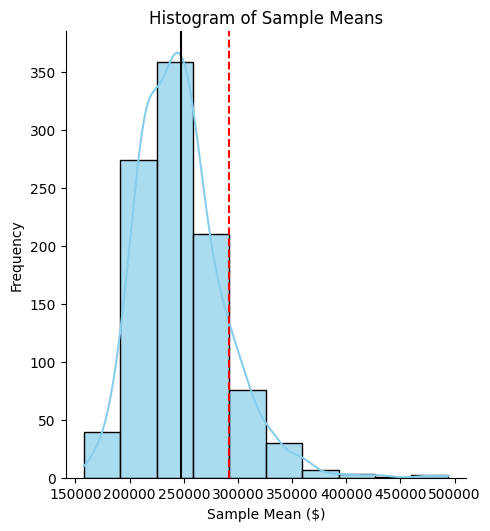

In [127]:
# ANSWER
# Plotting the histogram of sample means
plt.figure(figsize=(7, 5))
sns.displot(sample_means, kde=True, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_income, color='black', linestyle='solid')
plt.axvline(sample_mean, color='red', linestyle='dashed')
# Add title and labels
plt.title('Histogram of Sample Means')
plt.xlabel('Sample Mean ($)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

###### 8.A Describe the shape of the histogram of sample means (using sample size of 50)

**ANSWER:**


###### 8.B What is mean of the distribution of sample means?

In [118]:
# ANSWER
# Calculate the mean of the distribution of sample means
mean_of_sample_means = np.mean(sample_means)

print(f"Mean of the sample means (distribution of sample means): {mean_of_sample_means:,.4f}")

Mean of the sample means (distribution of sample means): 247,647.8255


**ANSWER:**

> If repeated random samples of a given size n are taken from a population of values for a quantitative variable, where the population mean is μ (mu) and the population standard deviation is σ (sigma) then the mean of all sample means (x-bars) is population mean μ (mu).

###### 8.C As the sample size grew, did your results confirm the CLT?

**ANSWER:**





---



---



> > > > > > > > > © 2025 Institute of Data


---



---



